#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')


#### Data Acquistion and About Dataset




In [2]:
df_Titanic = pd.read_csv("C:\\Trash\\Titanic.csv")
df_Titanic.head()

print('No. of Records:',df_Titanic.shape[0])
print('No. of Features:',df_Titanic.shape[1])
print('Features:', df_Titanic.columns)

df_Titanic.info()

No. of Records: 891
No. of Features: 12
Features: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Data Preprocessing

In [3]:
df_Titanic.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

#### Missing Data

In [4]:
df_Titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### Imputation for Age Feature



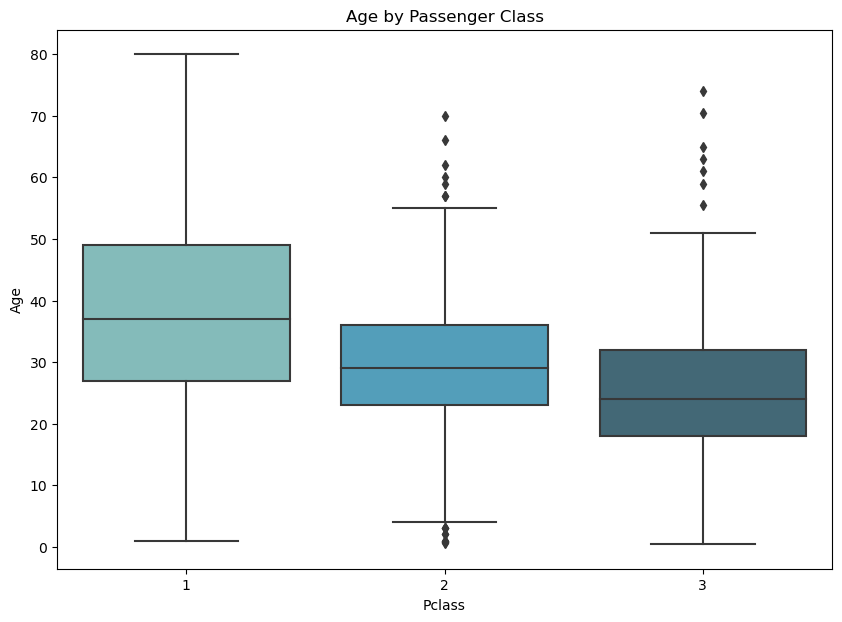

In [5]:
plt.figure(figsize = (10,7))
sb.boxplot(x = 'Pclass', y = 'Age', data = df_Titanic, palette= 'GnBu_d').set_title('Age by Passenger Class')
plt.show()

#### Computation of mean age by Passenger Class


In [6]:
age_mean = [df_Titanic[df_Titanic['Pclass'] == 1]['Age'].mean(),
df_Titanic[df_Titanic['Pclass'] == 2]['Age'].mean(), df_Titanic[df_Titanic['Pclass'] ==
3]['Age'].mean()]
print(age_mean)
age_mean = np.rint(age_mean)
age_mean

[38.233440860215055, 29.87763005780347, 25.14061971830986]


array([38., 30., 25.])

#### Imputation for Age Feature

In [7]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return age_mean[0]
        elif Pclass == 2:
            return age_mean[1]
        else:
            return age_mean[2]
    else:
        return Age


#### Apply the function to the Age column


In [8]:
df_Titanic['Age']=df_Titanic[['Age','Pclass']].apply(impute_age, axis =1 )

#### Remove cabin feature as it has more missing values


In [9]:
df_Titanic.drop('Cabin', axis = 1, inplace = True)

#### Remove records with Embarked missing (Only 2 records)


In [10]:
df_Titanic = df_Titanic.dropna(subset='Embarked')

df_Titanic.isnull().sum()

df_Titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


#### Target Feature (Class Feature)


Target Feature
Survived
0    549
1    340
dtype: int64 Survived
0    61.754781
1    38.245219
dtype: float64


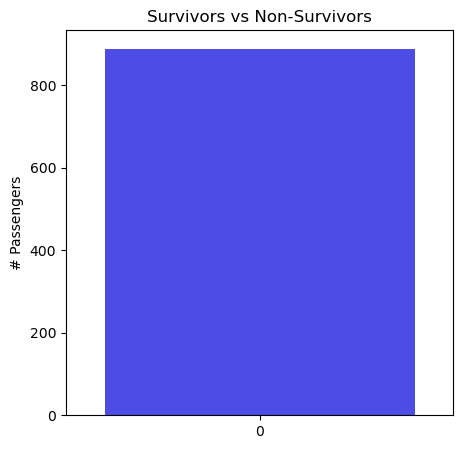

In [11]:
print('Target Feature')
print(df_Titanic.groupby('Survived').size(),
100*df_Titanic.groupby('Survived').size()/len(df_Titanic))

plt.figure(figsize = (5,5))
sb.countplot(df_Titanic['Survived'], alpha =.80, palette= ['blue','lightgreen'])
plt.title('Survivors vs Non-Survivors')
plt.ylabel('# Passengers')
plt.show()


#### Numerical Features: Fare, Age

In [12]:
num_var = ['Age','Fare']
df_Titanic[num_var].describe()

,Age,Fare
count,889.000000,889.000000
mean,29.218414,32.096681
std,13.178017,49.697504
min,0.420000,0.000000
25%,22.000000,7.895800
50%,26.000000,14.454200
75%,36.500000,31.000000
max,80.000000,512.329200


#### Visualization of Fare Feature


Text(0.5, 1.0, 'Ticket Fare')

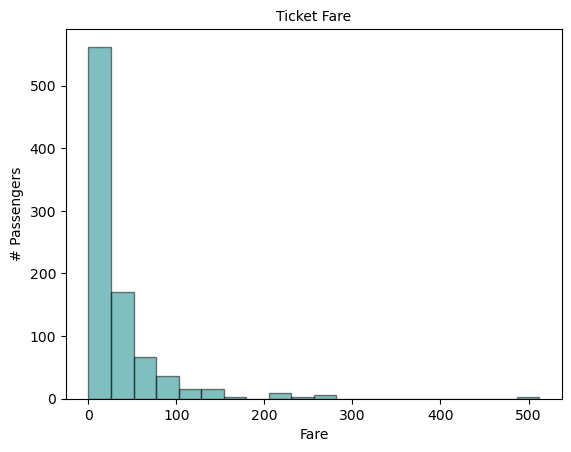

In [13]:
plt.hist(df_Titanic['Fare'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
plt.xlabel('Fare',fontsize = 10)
plt.ylabel('# Passengers',fontsize = 10)
plt.title('Ticket Fare',fontsize = 10)

#### Remove the records with outlier values for the feature Fare

In [14]:
df_Titanic[df_Titanic['Fare']>300]

df_Titanic = df_Titanic.drop(df_Titanic[df_Titanic['Fare']>300].index)

#### Survival Analyss based on Fare feature


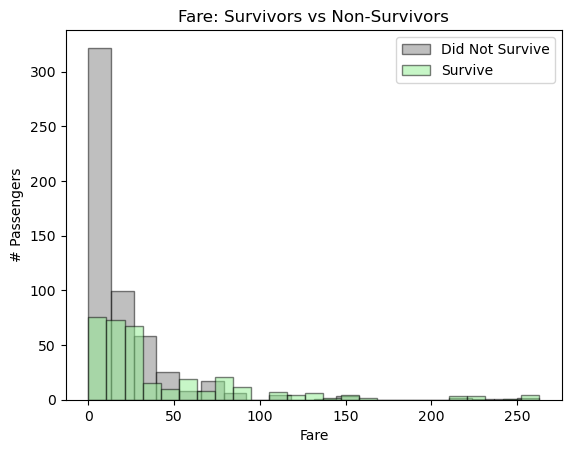

In [15]:
plt.hist(df_Titanic[df_Titanic['Survived']==0].Fare, bins = 20, label ='Did Not Survive', alpha
= .50,edgecolor= 'black',color ='grey')
plt.hist(df_Titanic[df_Titanic['Survived']==1].Fare, bins = 25, label = 'Survive', alpha = .50,
edgecolor = 'black',color = 'lightgreen')
plt.title('Fare: Survivors vs Non-Survivors')
plt.xlabel('Fare')
plt.ylabel('# Passengers')
plt.legend(loc = 'upper right')

#### Visualization of Age Feature


Text(0.5, 1.0, 'Age')

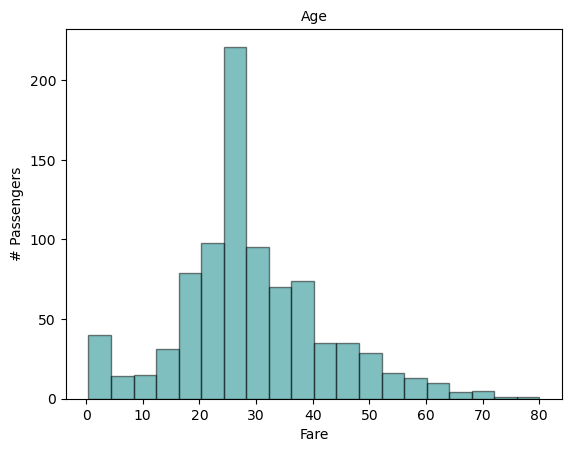

In [16]:
plt.hist(df_Titanic['Age'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
plt.xlabel('Fare',fontsize = 10)
plt.ylabel('# Passengers',fontsize = 10)
plt.title('Age',fontsize = 10)

#### Survival Analysis based on Age feature


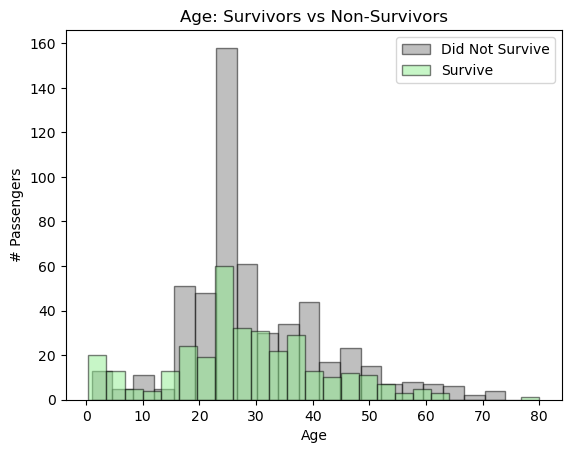

In [17]:
plt.hist(df_Titanic[df_Titanic['Survived']==0].Age, bins = 20, label ='Did Not Survive', alpha
= .50,edgecolor= 'black',color ='grey')
plt.hist(df_Titanic[df_Titanic['Survived']==1].Age, bins = 25, label = 'Survive', alpha = .50,
edgecolor = 'black',color = 'lightgreen')
plt.title('Age: Survivors vs Non-Survivors')
plt.xlabel('Age')
plt.ylabel('# Passengers')
plt.legend(loc = 'upper right')

#### Discrete Features: Pclass, SibSp, Parch
#### Crosstab analysis of discrete features on the target
#### Feature Pclass


In [18]:
df_Titanic.groupby('Pclass').size()

pd.crosstab(index = df_Titanic['Pclass'], columns = df_Titanic['Survived'])

Survived,0,1
Pclass,,
1,80,131
2,97,87
3,372,119


#### Feature SibSp


In [19]:
df_Titanic.groupby('SibSp').size()

pd.crosstab(index = df_Titanic['SibSp'], columns = df_Titanic['Survived'])

Survived,0,1
SibSp,,
0,398,205
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


#### Feature Parch


In [20]:
df_Titanic.groupby('Parch').size()

pd.crosstab(index = df_Titanic['Parch'], columns = df_Titanic['Survived'])

Survived,0,1
Parch,,
0,445,229
1,53,64
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0



#### Categorical Features: Sex, Embarked
#### Crosstab Analysis of Categorical Features on Target

#### Feature Sex


In [21]:
df_Titanic.groupby('Sex').size()

pd.crosstab(index = df_Titanic['Sex'], columns = df_Titanic['Survived'])

Survived,0,1
Sex,,
female,81,230
male,468,107


#### Feature Embarked


In [22]:
df_Titanic.groupby('Embarked').size()

pd.crosstab(index = df_Titanic['Embarked'], columns = df_Titanic['Survived'])

Survived,0,1
Embarked,,
C,75,90
Q,47,30
S,427,217


#### Encoding of Categorical Features
#### Convert categorical variables into dummy variables


In [23]:
sex = pd.get_dummies(df_Titanic['Sex'], drop_first = True)
embarked = pd.get_dummies(df_Titanic['Embarked'], drop_first = True)

#### Add new dummy columns to data frame


In [24]:
df_Titanic = pd.concat([df_Titanic, sex, embarked], axis = 1)
df_Titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1



#### Removing the features Sex, Embarked


In [25]:
df_Titanic = df_Titanic.drop(['Sex','Embarked'], axis = 1)
df_Titanic.head()# Add new dummy columns to data frame
df_Titanic = pd.concat([df_Titanic, sex, embarked], axis = 1)
df_Titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,1,0,1
